In [1]:
import tensorflow as tf

## 全连接层
### 张量实现方式
在 TensorFlow 中，要实现全连接层，只需要定义好权值张量𝑾和偏置张量𝒃，并利用TensorFlow 提供的批量矩阵相乘函数 tf.matmul()即可完成网络层的计算。

In [2]:
x=tf.random.normal([2,784])
w1=tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1))
b1=tf.Variable(tf.zeros([256]))
o1=tf.nn.relu(tf.matmul(x,w1)+b1)
o1.shape

TensorShape([2, 256])

### 层方式实现
全连接层本质上是矩阵的相乘和相加运算，实现并不复杂。但是作为最常用的网络层之一，TensorFlow 中有更高层、使用更方便的层实现方式：  tf.keras.layers.Dense(units, activation)。通过 layer.Dense 类，只需要指定输出节点数 Units 和激活函数类型 activation 即可。

需要注意的是，输入节点数会根据第一次运算时的输入 shape 确定，同时根据输入、输出节点数自动创建并初始化权值张量𝑾和偏置张量𝒃，因此在新建类 Dense 实例时，并不会立即创建权值张量𝑾和偏置张量𝒃，而是需要调用 build 函数或者直接进行一次前向计算，才能完成网络参数的创建.

In [3]:
x = tf.random.normal([4,28*28])
fc = tf.keras.layers.Dense(512, activation=tf.nn.relu)
h1 = fc(x) #通过fc实例完成一次全连接层的计算，返回输出张量
h1.shape

TensorShape([4, 512])

我们可以通过类内部的成员名 kernel 和 bias 来获取权值张量𝑾和偏置张量𝒃对象.

In [4]:
fc.bias.shape,fc.kernel.shape

(TensorShape([512]), TensorShape([784, 512]))

在优化参数时，需要获得网络的所有待优化的张量参数列表，可以通过类的trainable_variables 来返回待优化参数列表.

In [5]:
fc.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.0307861 ,  0.02505334,  0.05957434, ..., -0.03834952,
         -0.02201273,  0.0196663 ],
        [ 0.03959587, -0.06677919,  0.0529246 , ...,  0.03229767,
         -0.01608704,  0.02305287],
        [-0.00357806, -0.04588865,  0.03671522, ..., -0.00274219,
         -0.05812096,  0.00090273],
        ...,
        [-0.04790237,  0.0477358 ,  0.04936173, ..., -0.04971181,
         -0.05189843,  0.0638763 ],
        [-0.0523259 , -0.04522353,  0.0232817 , ..., -0.05746791,
         -0.03175919,  0.04712183],
        [-0.05114061,  0.04155791,  0.04887301, ..., -0.04635733,
          0.05610921, -0.04457173]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

实际上，网络层除了保存了待优化张量列表 trainable_variables，还有部分层包含了不参与梯度优化的张量，如后续介绍的 Batch Normalization 层，可以通过non_trainable_variables 成员返回所有不需要优化的参数列表。如果希望获得所有参数列表，可以通过类的 variables 返回所有内部张量列表.

In [6]:
fc.variables

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.0307861 ,  0.02505334,  0.05957434, ..., -0.03834952,
         -0.02201273,  0.0196663 ],
        [ 0.03959587, -0.06677919,  0.0529246 , ...,  0.03229767,
         -0.01608704,  0.02305287],
        [-0.00357806, -0.04588865,  0.03671522, ..., -0.00274219,
         -0.05812096,  0.00090273],
        ...,
        [-0.04790237,  0.0477358 ,  0.04936173, ..., -0.04971181,
         -0.05189843,  0.0638763 ],
        [-0.0523259 , -0.04522353,  0.0232817 , ..., -0.05746791,
         -0.03175919,  0.04712183],
        [-0.05114061,  0.04155791,  0.04887301, ..., -0.04635733,
          0.05610921, -0.04457173]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [7]:
fc.non_trainable_variables #对于全连接层，内部张量都参与梯度优化

[]

利用网络层类对象进行前向计算时，只需要调用类的_call_方法即可，即写成 fc(x)方式便可，它会自动调用类的_call_方法，在_call_方法中会自动调用 call 方法，这一设定由 TensorFlow 框架自动完成，因此用户只需要将网络层的前向计算逻辑实现在 call 方法中即可。对于全连接层类，在 call 方法中实现𝜎(𝑿@𝑾 + 𝒃)的运算逻辑，非常简单，最后返回全连接层的输出张量即可。

## 神经网络
通过层层堆叠全连接层，保证前一层的输出节点数与当前层的输入节点数匹配，，即可堆叠出任意层数的网络。我们把这种由神经元相互连接而成的网络叫做神经网络.

### 张量实现方式
对于多层神经网络，需要分别定义各层的权值矩阵𝑾和偏置向量𝒃。有多少个全连接层，则需要相应地定义数量相当的𝑾和𝒃，并且每层的参数只能用于对应的层，不能混淆使用。

In [8]:
# 隐藏层 1 张量
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
# 隐藏层 2 张量
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
# 隐藏层 3 张量
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))
# 输出层张量
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

在计算时，只需要按照网络层的顺序，将上一层的输出作为当前层的输入即可，重复直至最后一层，并将输出层的输出作为网络的输出.

In [9]:
with tf.GradientTape() as tape: # 梯度记录器
 # x: [b, 28*28]
 # 隐藏层 1 前向计算，[b, 28*28] => [b, 256]
 h1 = tf.nn.relu(x@w1 + b1)
 # 隐藏层 2 前向计算，[b, 256] => [b, 128]
 h2 = tf.nn.relu(h1@w2 + b2)
 # 隐藏层 3 前向计算，[b, 128] => [b, 64] 
 h3 = tf.nn.relu(h2@w3 + b3)
 # 输出层前向计算，[b, 64] => [b, 10] 
 h4 = h3@w4 + b4
 print(h4)

tf.Tensor(
[[-1.1520224   0.02800251  0.04077455  1.1807173  -0.45801836  0.74087614
  -0.62997156 -0.6039972   0.8701964  -0.72786236]
 [-1.8524578  -1.4776922   0.22549528  1.4150536  -0.8101743   0.44836786
  -0.12109007 -0.6369011   0.34190708 -0.31170875]
 [-0.6551108  -0.5689243   0.4464636   0.935695   -1.4232173   0.2832491
  -0.41899273 -0.53744495  0.86872536 -0.49260426]
 [-0.42790774 -0.5431154   0.21409398  1.1970259   0.52298003 -0.27145442
  -0.9328849   0.5241511   0.06733143 -0.29931188]], shape=(4, 10), dtype=float32)


在使用 TensorFlow 自动求导功能计算梯度时，需要将前向计算过程放置在tf.GradientTape()环境中，从而利用 GradientTape 对象的 gradient()方法自动求解参数的梯度，并利用 optimizers 对象更新参数。

### 层实现方式

In [10]:
fc1 = tf.keras.layers.Dense(256, activation=tf.nn.relu) # 隐藏层 1
fc2 = tf.keras.layers.Dense(128, activation=tf.nn.relu) # 隐藏层 2
fc3 = tf.keras.layers.Dense(64, activation=tf.nn.relu) # 隐藏层 3
fc4 = tf.keras.layers.Dense(10, activation=None) # 输出层
x = tf.random.normal([4,28*28])
h1 = fc1(x) # 通过隐藏层 1 得到输出
h2 = fc2(h1) # 通过隐藏层 2 得到输出
h3 = fc3(h2) # 通过隐藏层 3 得到输出
h4 = fc4(h3) # 通过输出层得到网络输出
h4

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 0.5810528 ,  0.13246839,  0.119058  ,  0.8072974 , -0.25786677,
         0.6725309 ,  0.03791695, -0.0383711 , -0.2510153 , -0.26235825],
       [ 1.1825596 , -0.8525967 , -0.55998063,  0.72997564,  0.1433095 ,
         0.06088633, -0.44098833,  0.9646764 ,  0.48161718,  0.76033294],
       [ 0.4486311 , -0.6438426 , -0.48827866,  0.46292692, -0.39431956,
         0.536526  , -0.04334838,  0.6948558 ,  0.5270436 , -0.62587714],
       [ 1.7108536 , -0.52808905, -0.5854454 ,  0.65135336, -0.95732445,
         0.8923924 , -0.08443288,  1.7131099 ,  0.63129103, -1.2806594 ]],
      dtype=float32)>

对于这种数据依次向前传播的网络，也可以通过 Sequential 容器封装成一个网络大类对象，调用大类的前向计算函数一次即可完成所有层的前向计算，使用起来更加方便.

In [11]:
model = tf.keras.Sequential([
 tf.keras.layers.Dense(256, activation=tf.nn.relu) , # 创建隐藏层 1
 tf.keras.layers.Dense(128, activation=tf.nn.relu) , # 创建隐藏层 2
 tf.keras.layers.Dense(64, activation=tf.nn.relu) , # 创建隐藏层 3
 tf.keras.layers.Dense(10, activation=None) , # 创建输出层
])
out = model(x) 

In [12]:
out

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 0.47004792,  0.3292418 ,  0.18572573,  0.9790394 ,  0.00144357,
         0.90535516,  0.5625309 , -1.2372607 , -0.51175964, -0.08494966],
       [ 0.40531605, -0.5611396 ,  0.7220759 ,  0.28085154, -0.0097964 ,
         1.0257103 ,  0.59307504, -0.7446377 , -0.08032487, -0.8738212 ],
       [ 0.6008719 , -0.07689157,  0.1196698 ,  0.6115551 , -0.02869617,
         0.07558417, -0.56385547, -1.0759587 ,  0.4417197 , -1.0154778 ],
       [ 0.01380794,  0.0092223 ,  0.05303073,  0.8372243 ,  0.34661916,
         0.38628712,  0.34566957, -0.4173436 ,  0.5827942 , -0.61464185]],
      dtype=float32)>

## 激活函数

### sigmoid
将值映射到[0,1]

In [13]:
x = tf.linspace(-6.,6.,10)
x,tf.nn.sigmoid(x) 

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-6.       , -4.6666665, -3.3333333, -2.       , -0.6666665,
         0.666667 ,  2.       ,  3.333334 ,  4.666667 ,  6.       ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.00247264, 0.00931591, 0.03444517, 0.11920291, 0.33924365,
        0.6607564 , 0.8807971 , 0.96555483, 0.99068403, 0.99752736],
       dtype=float32)>)

## ReLU

In [14]:
tf.nn.relu(x)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.      , 0.      , 0.      , 0.      , 0.      , 0.666667,
       2.      , 3.333334, 4.666667, 6.      ], dtype=float32)>

## LeakyReLU
ReLU 函数在𝑥 < 0时导数值恒为 0，也可能会造成梯度弥散现象，为了克服这个问题，LeakyReLU 函数被提出.  
$LeakyReLU=\begin{cases} x &,x\geq 0 \\ px &,x<0\end{cases}$

In [15]:
tf.nn.leaky_relu(x, alpha=0.1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.6       , -0.46666667, -0.33333334, -0.2       , -0.06666666,
        0.666667  ,  2.        ,  3.333334  ,  4.666667  ,  6.        ],
      dtype=float32)>

其中 alpha 参数代表𝑝。tf.nn.leaky_relu 对应的类为 layers.LeakyReLU，可以通过LeakyReLU(alpha)创建 LeakyReLU 网络层，并设置𝑝参数，像 Dense 层一样将 LeakyReLU层放置在网络的合适位置。

### Tanh
将值映射到[-1,1]

In [16]:
tf.nn.tanh(x)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.99998784, -0.99982315, -0.9974579 , -0.9640276 , -0.58278286,
        0.58278316,  0.9640276 ,  0.99745804,  0.99982315,  0.99998784],
      dtype=float32)>

### Softmax
Softmax 函数不仅可以将输出值映射到[0,1]区间，还满足所有的输出值之和为 1 的特性。

In [17]:
z = tf.constant([2.,1.,0.1])
tf.nn.softmax(z)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6590012 , 0.24243298, 0.09856589], dtype=float32)>

与 Dense 层类似，Softmax 函数也可以作为网络层类使用，通过类 layers.Softmax(axis=-1)可以方便添加 Softmax 层，其中 axis 参数指定需要进行计算的维度。

在 Softmax 函数的数值计算过程中，容易因输入值偏大发生数值溢出现象；在计算交叉熵时，也会出现数值溢出的问题。为了数值计算的稳定性，TensorFlow 中提供了一个统一的接口，将 Softmax 与交叉熵损失函数同时实现，同时也处理了数值不稳定的异常，一般推荐使用这些接口函数，避免分开使用 Softmax 函数与交叉熵损失函数。函数式接口为tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False)

y_true 代表了One-hot 编码后的真实标签，y_pred 表示网络的预测值，当 from_logits 设置为 True 时，y_pred 表示须为未经过 Softmax 函数的变量 z；当 from_logits 设置为 False 时，y_pred 表示为经过 Softmax 函数的输出。为了数值计算稳定性，一般设置 from_logits 为 True，此时tf.keras.losses.categorical_crossentropy 将在内部进行 Softmax 函数计算，所以不需要在模型中显式调用 Softmax 函数.

In [18]:
z = tf.random.normal([2,10]) # 构造输出层的输出
y_onehot = tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10) # one-hot 编码
# 输出层未使用 Softmax 函数，故 from_logits 设置为 True
# 这样 categorical_crossentropy 函数在计算损失函数前，会先内部调用 Softmax 函数
loss = tf.keras.losses.categorical_crossentropy(y_onehot,z,from_logits=True)
loss = tf.reduce_mean(loss) # 计算平均交叉熵损失
loss

<tf.Tensor: shape=(), dtype=float32, numpy=3.1002355>

除了函数式接口，也可以利用 losses.CategoricalCrossentropy(from_logits)类方式同时实现 Softmax 与交叉熵损失函数的计算，from_logits 参数的设置方式相同。

In [19]:
criteon = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss = criteon(y_onehot,z) # 计算损失
loss

<tf.Tensor: shape=(), dtype=float32, numpy=3.1002355>

## 误差计算

### MSE

In [20]:
o = tf.random.normal([2,10]) # 构造网络输出
y_onehot = tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10)
loss = tf.keras.losses.MSE(y_onehot, o) # 计算均方差
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.90097064>

也可以通过层方式实现，对应的类为 keras.losses.MeanSquaredError()，和其他层的类一样，调用__call__函数即可完成前向计算

In [21]:
criteon = tf.keras.losses.MeanSquaredError()
loss = criteon(y_onehot,o) # 计算 batch 均方差
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.90097064>

### Cross Entropy

$𝐻(𝑝||𝑞) ≜ −∑𝑝(𝑖) log  𝑞(𝑖)$

In [22]:
z = tf.random.normal([2,10]) # 构造输出层的输出
y_onehot = tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10) # one-hot 编码
# 输出层未使用 Softmax 函数，故 from_logits 设置为 True
# 这样 categorical_crossentropy 函数在计算损失函数前，会先内部调用 Softmax 函数
loss = tf.keras.losses.categorical_crossentropy(y_onehot,z,from_logits=True)
loss = tf.reduce_mean(loss) # 计算平均交叉熵损失
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.9137573>

也可以通过层方式实现，对应的类为 keras.losses.CategoricalCrossentropy(from_logits)，和其他层的类一样，调用call函数即可完成前向计算

In [23]:
criteon = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss = criteon(y_onehot,z) # 计算损失
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.9137573>

## 神经网络模型 

### CNN

Yann Lecun 在 1986 年提出了卷积神经网络(Convolutional Neural Network，简称 CNN)。  
其中比较流行的模型有用于图片分类的 AlexNet、VGG、GoogLeNet、ResNet、DenseNet 等，用于目标识别的 RCNN、Fast RCNN、Faster RCNN、Mask RCNN、YOLO、SSD 等

### RNN

除了具有空间结构的图片、视频等数据外，序列信号也是非常常见的一种数据类型，其中一个最具代表性的序列信号就是文本数据。如何处理并理解文本数据是自然语言处理的一个核心问题。卷积神经网络由于缺乏 Memory 机制和处理不定长序列信号的能力，并不擅长序列信号的任务。循环神经网络(Recurrent Neural Network，简称 RNN)在 Yoshua Bengio、Jürgen Schmidhuber 等人的持续研究下，被证明非常擅长处理序列信号。  
1997年，Jürgen Schmidhuber 提出了 LSTM 网络，作为 RNN 的变种，它较好地克服了 RNN 缺乏长期记忆、不擅长处理长序列的问题，在自然语言处理中得到了广泛的应用.  
其他的 RNN 变种还有 GRU、双向 RNN 等。

### Attention Mechanism

RNN 并不是自然语言处理的最终解决方案，近年来随着注意力机制(Attention Mechanism)的提出，克服了 RNN 训练不稳定、难以并行化等缺陷，在自然语言处理和图片生成等领域中逐渐崭露头角。注意力机制最初在图片分类任务上提出，但逐渐开始侵蚀NLP 各大任务。  
2017 年，Google 提出了第一个利用纯注意力机制实现的网络模型Transformer，随后基于 Transformer 模型相继提出了一系列的用于机器翻译的注意力网络模型，如 GPT、BERT、GPT-2 等。

### GCN

图片、文本等数据具有规则的空间、时间结构，称为 Euclidean Data(欧几里德数据)。卷积神经网络和循环神经网络被证明非常擅长处理这种类型的数据。而像类似于社交网络、通信网络、蛋白质分子结构等一系列的不规则空间拓扑结构的数据，它们显得力不从心。  
2016 年，Thomas Kipf 等人基于前人在一阶近似的谱卷积算法上提出了图卷积网络(Graph Convolution Network，GCN)模型.  
随后，一系列的网络模型相继被提出，如 GAT，EdgeConv，DeepGCN 等。

## 实战

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Download the Car Efficiency Dataset Online
dataset_path=tf.keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
#print (dataset_path) 

In [26]:
#Read datasets with pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [27]:
dataset.shape

(398, 8)

In [28]:
dataset.isna().sum() # Count blank data

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [29]:
dataset = dataset.dropna() # delete rows with blank data
dataset.isna().sum() # Count blank data again

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [30]:
dataset.shape

(392, 8)

In [31]:
origin = dataset.pop('Origin')
# 根据 origin 列来写入新的 3 个列
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail() 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [32]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #Randomly select 80% of the data as the training set
test_dataset = dataset.drop(train_dataset.index) 

In [33]:
dataset.shape,train_dataset.shape,test_dataset.shape

((392, 10), (314, 10), (78, 10))

In [34]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [35]:
train_dataset.shape,train_labels.shape,test_dataset.shape,test_labels.shape

((314, 9), (314,), (78, 9), (78,))

In [36]:
train_stats = train_dataset.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [37]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.shape,train_labels.shape,normed_test_data.shape, test_labels.shape

((314, 9), (314,), (78, 9), (78,))

In [38]:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

In [39]:
class Network(tf.keras.Model):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(64, activation='relu')
        self.fc3 = tf.keras.layers.Dense(1)
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [40]:
model = Network()
model.build(input_shape=(1, 9)) #Complete the creation of internal tensors through the build function
model.summary()
optimizer = tf.keras.optimizers.Adam() 
losses=[]
for epoch in range(200): 
    for step, (x,y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(tf.keras.losses.MSE(y, out))
        if step % 10 == 0: 
            losses.append(loss)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("over")

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  640       
_________________________________________________________________
dense_10 (Dense)             multiple                  4160      
_________________________________________________________________
dense_11 (Dense)             multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
over


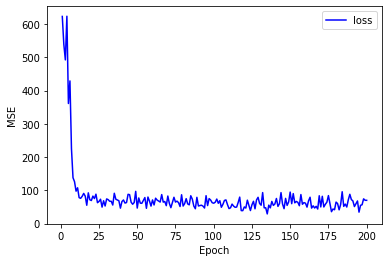

In [42]:
import matplotlib.pyplot as plt
plt.plot(range(1, 201), losses, color='b', label='loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()